In [199]:
# Importing the libraries
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [200]:
# Read all the csv files in the folder
data_list = glob.glob('Airbnb Prices in Europe/*.csv')

# Now we can use pandas to read all the csv files and combine them into one
df = pd.concat(map(pd.read_csv, data_list))

# Cross-Featuring the longitude and latitude
df['lng-lat'] = df['lng'] * df['lat'] / 1000000

# Drop the index column
df.drop(['Unnamed: 0', 'rest_index_norm', 'attr_index_norm', 'room_private', 'room_shared', 'cleanliness_rating', 'lng', 'lat'], axis=1, inplace=True)

# Check if there are any null values
df.isnull().sum()

realSum                       0
room_type                     0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
rest_index                    0
lng-lat                       0
dtype: int64

<Axes: >

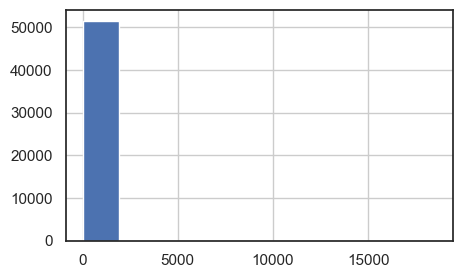

In [201]:
# Visualize the distribution of the prices
plt.figure(figsize=(5, 3))
df.realSum.hist()

In [202]:
# Calculate the statistics of the prices
df.realSum.describe()

count    51707.000000
mean       279.879591
std        327.948386
min         34.779339
25%        148.752174
50%        211.343089
75%        319.694287
max      18545.450285
Name: realSum, dtype: float64

In [203]:
# Calculate the distribution of the prices
bins = [0, 50, 100, 150, 200, 350, 500, 1000, 1500, 2500, 3000, 3500, int(df.realSum.max())]
bin_counts = pd.cut(df.realSum, bins).value_counts()
bin_percentages = bin_counts / df.shape[0] * 100
hist_df = pd.DataFrame({'range': bin_percentages.index, '%': bin_percentages.values})
hist_df = hist_df.sort_values('range')
hist_df

,range,%
8,"(0, 50]",0.096699
5,"(50, 100]",5.883149
2,"(100, 150]",19.589224
1,"(150, 200]",20.521399
0,"(200, 350]",32.889164
3,"(350, 500]",10.990775
4,"(500, 1000]",8.538496
6,"(1000, 1500]",0.992129
7,"(1500, 2500]",0.348115
10,"(2500, 3000]",0.048349


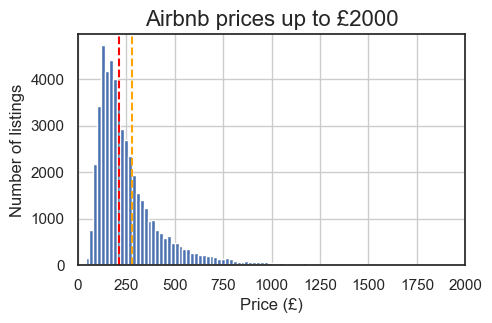

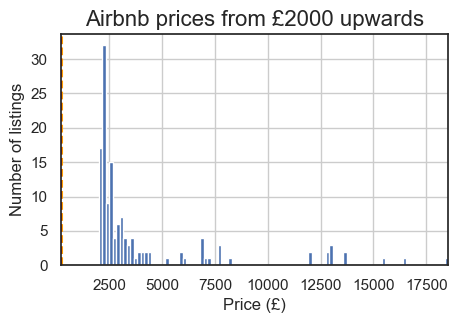

In [204]:
# Visualize the distribution of the prices up to £1500
plt.figure(figsize=(5, 3))
df.realSum.hist(bins=100, range=(0, 2000))
plt.margins(x=0)
plt.axvline(df.realSum.mean(), color='orange', linestyle='--')
plt.axvline(df.realSum.median(), color='red', linestyle='--')
plt.title("Airbnb prices up to £2000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

# Visualize the distribution of the prices from £2000 upwards
plt.figure(figsize=(5, 3))
df.realSum.hist(bins=100, range=(2000, max(df.realSum)))
plt.margins(x=0)
plt.axvline(df.realSum.mean(), color='orange', linestyle='--')
plt.axvline(df.realSum.median(), color='red', linestyle='--')
plt.title("Airbnb prices from £2000 upwards", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

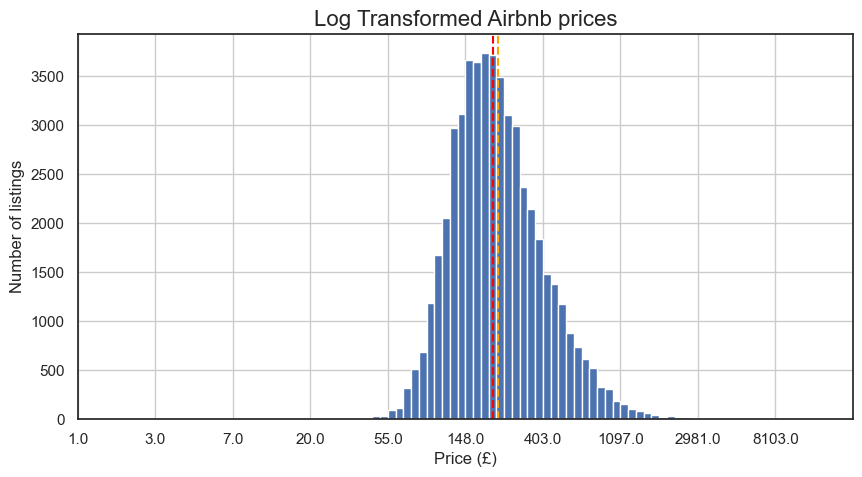

In [205]:
plt.figure(figsize=(10,5))
np.log(df.realSum).hist(bins=100, range=(0, 10))
plt.margins(x=0)

# Change the x-axis to show the actual price rounded to the nearest £
plt.xticks(np.arange(0, 10, step=1), np.exp(np.arange(0, 10, step=1)).round())

plt.axvline(np.log(df.realSum).mean(), color='orange', linestyle='--')
plt.axvline(np.log(df.realSum).median(), color='red', linestyle='--')
plt.title("Log Transformed Airbnb prices", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

In [206]:
# Based on the log transformed data drop the rows with price over £2000 a
df = df[(df.realSum <= 2000) & (df.realSum >= 55)]

<Axes: >

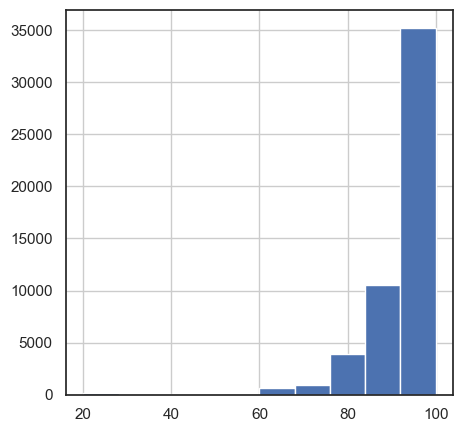

In [207]:
# Visualizing the distribution of the satisfaction rating
df.guest_satisfaction_overall.hist(figsize=(5, 5))

In [208]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [209]:
# Binning cleanliness_rating column into 3 bins
bin_column('guest_satisfaction_overall',
               bins=[0, 80, 95, 100],
               labels=['0-79/100', '80-94/100', '95-100/100'],
               na_label='no reviews')

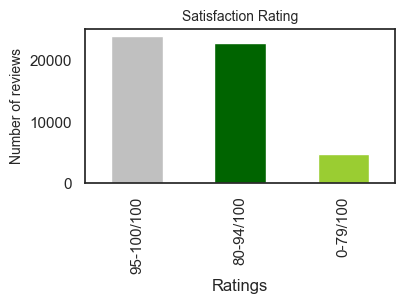

In [210]:
# Set the size of the figure
fig, ax = plt.subplots(1, 1, figsize=(4,2))

# Plot the barplot
ax.set_title('Satisfaction Rating', fontsize=10)

# Plot the barplot
df['guest_satisfaction_overall'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of reviews', fontsize=10)
plt.show()

In [211]:
# Get the numeric columns by excluding the categorical columns
num_cols = ['realSum', 'person_capacity', 'bedrooms', 'metro_dist', 'dist', 'lng-lat', 'rest_index', 'attr_index']

# Get the categorical columns by excluding df columns from the numeric columns
cat_cols = [col for col in df.columns if col not in num_cols]

# Get dummy variables for categorical and boolean columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Check the first 5 rows of the dataframe
df.head()

,realSum,person_capacity,bedrooms,dist,metro_dist,attr_index,rest_index,lng-lat,room_type_Private room,room_type_Shared room,host_is_superhost_True,multi_1,biz_1,guest_satisfaction_overall_80-94/100,guest_satisfaction_overall_95-100/100
0,194.033698,2.0,1,5.022964,2.539380,78.690379,98.253896,0.000257,1,0,0,1,0,1,0
1,344.245776,4.0,1,0.488389,0.239404,631.176378,837.280757,0.000257,1,0,0,0,0,1,0
2,264.101422,2.0,1,5.748312,3.651621,75.275877,95.386955,0.000261,1,0,0,0,1,1,0
3,433.529398,4.0,2,0.384862,0.439876,493.272534,875.033098,0.000256,1,0,0,0,1,1,0
4,485.552926,2.0,1,0.544738,0.318693,552.830324,815.305740,0.000257,1,0,1,0,0,0,1


/var/folders/71/krwvwqnd59748c6sr2hd_3mh0000gn/T/ipykernel_17260/2342598156.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


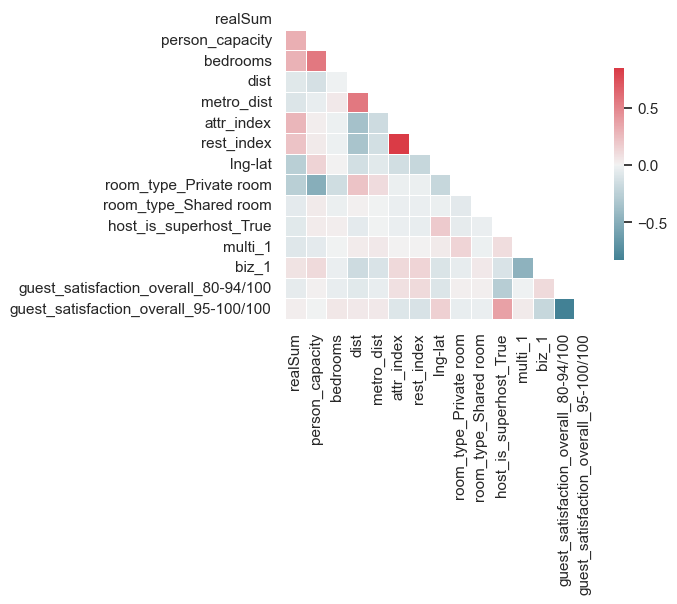

In [212]:
# Set the style of the visualization
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the multi-collinear heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

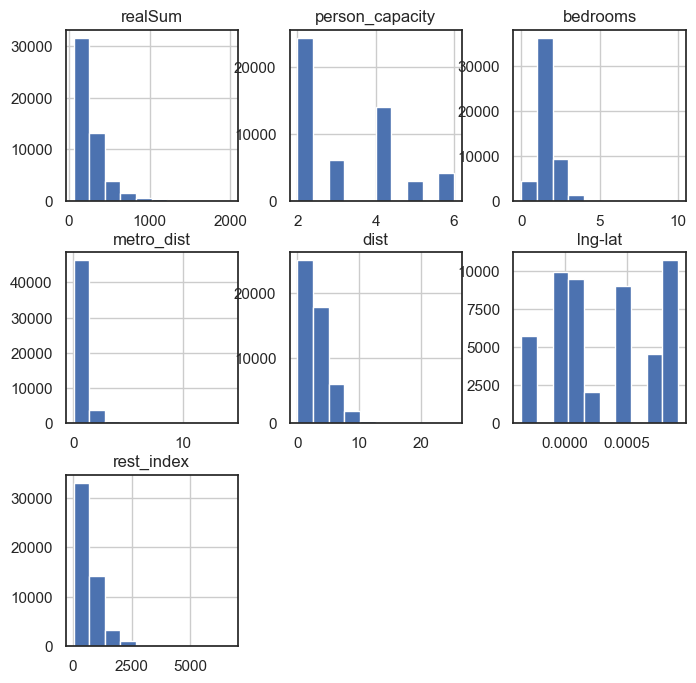

In [213]:
# Remove attr_index from the list of numeric columns due to high correlation with rest_index
num_cols.remove('attr_index')

# Dropping the columns guest_satisfaction_overall_80-94/100 and attr_index
df.drop(['guest_satisfaction_overall_80-94/100', 'attr_index'], axis=1, inplace=True)

# Comparing the features distribution
df[num_cols].hist(figsize=(8, 8))
plt.show()

In [214]:
import numpy as np

for col in num_cols:
    df[col] = df[col].replace(0.0, 0.01)
    df[col] = np.log(df[col]+ 0.01)

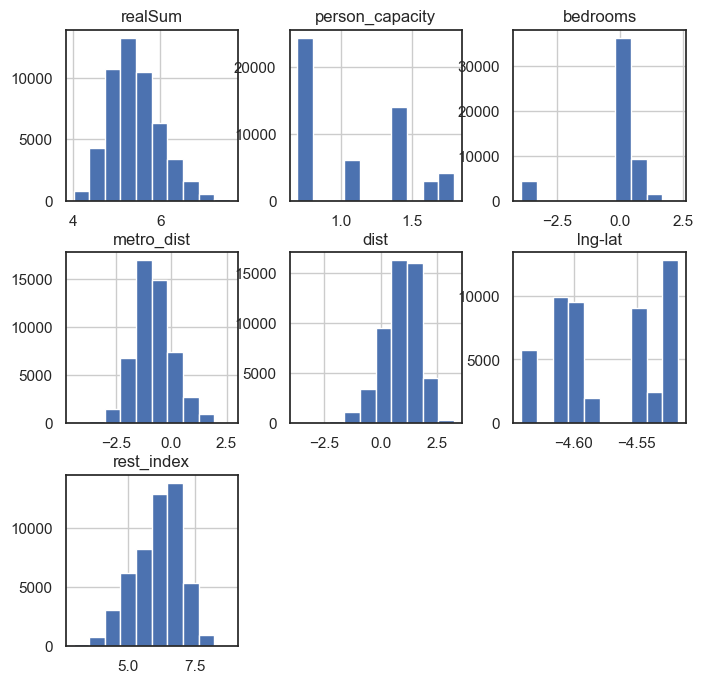

In [215]:
# Comparing the features distribution
df[num_cols].hist(figsize=(8, 8))
plt.show()

In [216]:
# Removing dropped columns from the list of categorical columns
cat_cols = [col for col in df.columns if col not in num_cols]

In [217]:
from sklearn.preprocessing import StandardScaler

# Defining the features and target
X = df.drop('realSum', axis=1)
y = df.realSum

# Scaling the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [218]:
from sklearn.model_selection import train_test_split

# Split the training data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [219]:
from time import time
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_start = time()

# Instantiate the model (Used hyperparameter tuning by GridSearchCV for best parameters)
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.3, reg_lambda=0, reg_alpha=0.001, n_jobs=4, early_stopping_rounds=5, random_state=42)

# Fit the model
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Predict on the training set
train_pred = xgb.predict(X_train)

# Predict on the validation set
val_pred = xgb.predict(X_val)

xgb_end = time()

# Calculate the scores
print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_val, val_pred),4))
print("\nTraining r2:", round(r2_score(y_train, train_pred),4))
print("Validation r2:", round(r2_score(y_val, val_pred),4))

Time taken to run: 0.1 minutes

Training MSE: 0.0233
Validation MSE: 0.0662

Training r2: 0.9303
Validation r2: 0.8014


In [220]:
# Get the feature importances from the XGBoost model
ft_weights_xgb = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb.sort_values('weight', inplace=True)
ft_weights_xgb

,weight
host_is_superhost_True,0.007577
multi_1,0.007702
metro_dist,0.008509
dist,0.009124
biz_1,0.020992
rest_index,0.022413
person_capacity,0.023294
guest_satisfaction_overall_95-100/100,0.030570
bedrooms,0.057068
lng-lat,0.083619


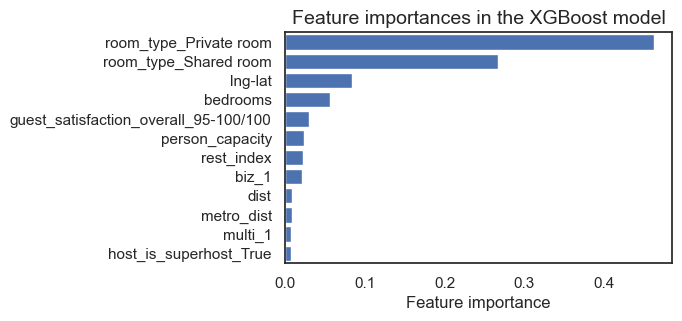

In [221]:
# Plot the feature importances in the XGBoost model
plt.figure(figsize=(5,3))
plt.barh(ft_weights_xgb.index, ft_weights_xgb.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

[Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, ''),
 Text(0, 6.0, ''),
 Text(0, 7.0, ''),
 Text(0, 8.0, ''),
 Text(0, 9.0, '')]

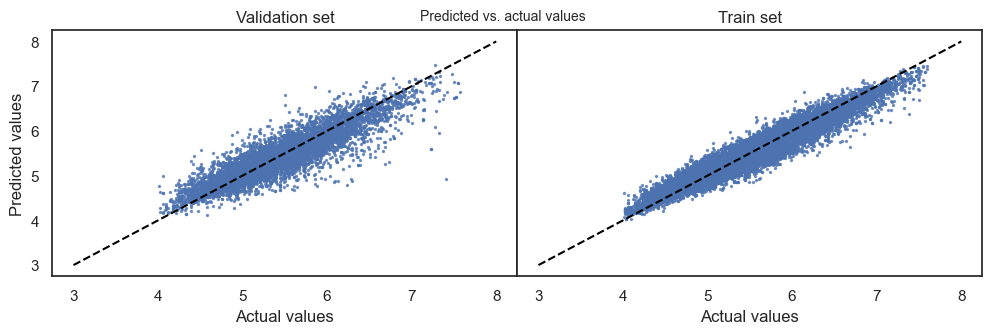

In [222]:
# Scatterplot of predicted vs. actual values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle('Predicted vs. actual values', fontsize=10, y=1)
plt.subplots_adjust(top=0.93, wspace=0)

# Plot the scatter-plot of the validation set
ax1.scatter(y_val, val_pred, s=2, alpha=0.7)
ax1.plot(list(range(3, 9)), list(range(3, 9)), color='black', linestyle='--')
ax1.set_title('Validation set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')

# Plot the scatter-plot of the training set
ax2.scatter(y_train, train_pred, s=2, alpha=0.7)
ax2.plot(list(range(3, 9)), list(range(3, 9)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

[Text(0, 0.0, ''),
 Text(0, 500.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1500.0, ''),
 Text(0, 2000.0, ''),
 Text(0, 2500.0, ''),
 Text(0, 3000.0, ''),
 Text(0, 3500.0, ''),
 Text(0, 4000.0, '')]

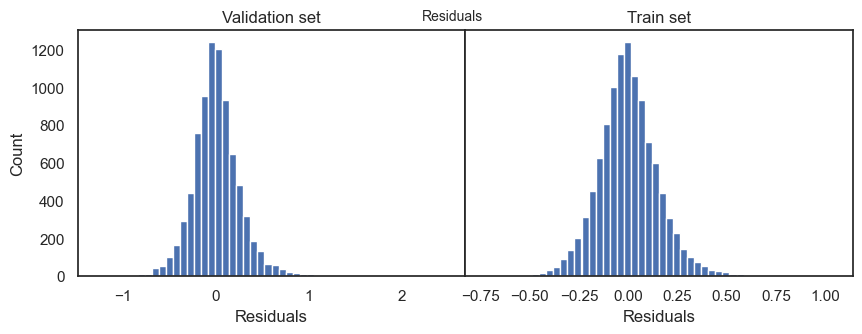

In [223]:
# Plotting training and validation residuals side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Residuals', fontsize=10, y=1)
plt.subplots_adjust(top=0.93, wspace=0)

# Create a histogram of the residuals
ax1.hist(y_val - val_pred, bins=50)
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Count')
ax1.set_title('Validation set')

# Create a histogram of the residuals
ax2.hist(y_train - train_pred, bins=50)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Count')
ax2.set_title('Train set')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')